# Додаткове завдання до модуля 4: візуалізація даних.
В цьому ДЗ ми будемо багато працювати не тільки з візуалізаціями, а і з функціоналом pandas, адже візуалізація даних - це частина аналізу даних та працює спільно з агрегацією та фільтрацією наших даних. До того ж перед тим, як аналізувати дані, їх треба почистити. Чим ми і займемось.  

0.Імпортуйте бібліотеки matplotlib.pyplot, seaborn та pandas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Набір даних Taxis

Використовуючи метод з бібліотеки `seaborn` `load_dataset` ми завантажимо перший набір даних для аналізу. Завантажимо дані так, бо це зручно + аби ви знали, що є і така можливість знайти собі набір даних для експериментів.  
Набір даних містить поїздки таксі у Нью Йорку у 2019 році. Детальний опис на [сайті](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

Які колонки мість набір даних:  
- `pickup` - час початку поїздки  
- `dropoff` - час закінчення поїздки  
- `passengers` - кількість пасажирів у поїздці  
- `distance` - відстань поіздки  
- `fare` - базова плата за поїздку  
- `tip` - розмір чайових  
- `tolls` - плата за платні дороги (за це також платить пасажир)  
- `total` - сумарна плата за поїздку  
- `color` - колір авто, яке здійснювало поїздку  
- `payment` - метод оплати  
- `pickup_zone` - зона, у якій почалась поїздка  
- `dropoff_zone` - зона, у якій закінчилась поїздка  
- `pickup_borough` - район, у якому почалась поїздка  
- `dropoff_borough` - район, у якому закінчилась поїздка  

Назви ознак здбільшого говорять самі за себе. Слово borough перекладається з англійської як "район".

Ми будемо працювати сами з тим шматочком даних, які наявні в seaborn.  
Переглянути всі набори даних з seaborn можна [тут](https://github.com/mwaskom/seaborn-data).

Спершу - завантажуємо дані - просто виконайте клітинку нижче.

In [2]:
df_taxi = sns.load_dataset('taxis')

1.Виведіть
- перші 3 записи з набору даних
- типи даних в наборі даних df_taxi
- розміри набору даних

In [5]:
display(df_taxi.head(3), df_taxi.dtypes, df_taxi.shape)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


,0
pickup,datetime64[ns]
dropoff,datetime64[ns]
passengers,int64
distance,float64
fare,float64
tip,float64
tolls,float64
total,float64
color,object
payment,object


(6433, 14)

Очікуваний результат (можна вивести в окремих клітинках):

![](https://drive.google.com/uc?export=view&id=1rsgJvFEdXwGDTVl3CyyRL2ao8rzR_8P2)

2.Перевіримо, чи є в цьому наборі даних пропущені значення. Для цього можемо вивести кількість пропущених значень в кожній колонці наступним чином (це надзвичайно корисна команда, запамʼятайте її):

In [6]:
df_taxi.isna().sum()

,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,44


Цікаво, чому дані відсутні? Відповідь на це питання нам дасть розуміння, чи можна такі дані видалити, чи можливо їх треба якось заповнити. Виведіть на екран ті рядки, де колонка, яка має найбільше пропущених значень (або одна з тих, що має максимальну кількість пропущених), має пропущені значення.
Подивіться на результат і напишіть свої думки щодо питань:
- чому на ваш погляд в цих рядках є відстуні дані в кількох колонках? Чому ви так думаєте?
- чому на ваш погляд є рядки з distance==0, а total!=0? Як ви до цього прйишли?
Відповідь просто текстом. Можна використовувати будь-які допоміжні операції над датасетом чи джерела, які допоможуть вам відповісти на ці питання. Якщо щось використовуєте, то це треба зазначити у відповіді.  

Ваша відповідь тут - це 70% виконання цього завдання.

In [52]:
df_taxi[df_taxi.dropoff_borough.isna()]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.00,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
711,2019-03-21 17:39:50,2019-03-21 18:12:54,2,1.74,17.0,4.26,0.00,25.56,yellow,credit card,Midtown East,NaN,Manhattan,NaN
739,2019-03-14 00:09:17,2019-03-14 00:09:21,1,0.03,2.5,0.00,0.00,3.80,yellow,cash,Upper East Side South,NaN,Manhattan,NaN
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.00,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1108,2019-03-10 09:33:13,2019-03-10 09:52:04,1,13.40,52.0,11.70,5.76,70.26,yellow,credit card,NaN,NaN,NaN,NaN
1112,2019-03-12 19:09:23,2019-03-12 19:20:46,1,0.90,8.5,1.92,0.00,14.72,yellow,credit card,Times Sq/Theatre District,NaN,Manhattan,NaN
1230,2019-03-29 07:52:46,2019-03-29 08:02:40,1,0.90,5.5,1.76,0.00,10.56,yellow,credit card,Yorkville East,NaN,Manhattan,NaN
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.00,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN
1787,2019-03-28 06:58:57,2019-03-28 07:18:10,1,6.32,20.5,4.26,0.00,25.56,yellow,credit card,Manhattan Valley,NaN,Manhattan,NaN


_Пропущені значення в колонках, таких як dropoff_zone та payment, можуть виникати через незавершені або скасовані поїздки, технічні збої або неповне внесення даних.
Поїздки з distance == 0 та total != 0, ймовірно, не відбулися фактично — це може бути результат скасування, але з нарахуванням комісії. Більшість із них мають короткий час між pickup і dropoff, однакові зони або NA_

3.Заповнимо пусті значення. Оскільки всі колонки набору даних мають пропущені значення в рядках з типом даних рядок, заповнимо пропущені значення рядком `NA`.
Створіть набір даних `df_taxi_clean`, який містить дані `df_taxi` із заповненими пропущеними значеннями у всіх колонках (де ті значення відсутні) значенням `NA`.

**УВАГА!** Надалі в роботі треба використовувати `df_taxi_clean`, ми ж його і створили для того, аби далі ним користуватись :)

In [12]:
df_taxi_clean = df_taxi.fillna('NA')

Після виконання завдання запустіть наступну клітинку:

In [13]:
df_taxi_clean.isna().sum()

,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,0


Очікуваний результат виконання коду в попердній клітинці:

![](https://drive.google.com/uc?export=view&id=1G5_k_jmtNFFRdn7Kcw_fEoJyrkTeOGP4)

4.Хочеться подивитись на дані у динаміці. Перетворіть колонку `pickup` набору даних `df_taxi_clean` (нам нема чого працювати з "брудними" даними, якщо ми їх вже почистили, але хай будуть в окремій змінній про всяк випадок) у формат `datetime64[ns]`.
Якщо у Вас при завантаженні набору даних колонка `pickup`- вже в форматі `datetime64[ns]` - можете пропустити це завдання, або спробувати все ж таки написат функцію для трансформації.

Результат перетворення збережіть в тій самій колонці `pickup`.

In [14]:
df_taxi_clean.pickup.astype("datetime64[ns]")

,pickup
0,2019-03-23 20:21:09
1,2019-03-04 16:11:55
2,2019-03-27 17:53:01
3,2019-03-10 01:23:59
4,2019-03-30 13:27:42
...,...
6428,2019-03-31 09:51:53
6429,2019-03-31 17:38:00
6430,2019-03-23 22:55:18
6431,2019-03-04 10:09:25


Після виконання завдання запустіть наступну клітинку:

In [15]:
df_taxi_clean.pickup.head(3)

,pickup
0,2019-03-23 20:21:09
1,2019-03-04 16:11:55
2,2019-03-27 17:53:01


Очікуваний результат виконання коду в попердній клітинці:

![](https://drive.google.com/uc?export=view&id=106hQKdEhLV3OIeFsP8yvXLo0cKk6Jmqo)

5.У нас колонка pickup зараз мість дані у форматі дата-час. Пропоную прибрати час і зробити аналітику по дням. Для цього виконайте клатинку нижче:

In [16]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')

А тепер згрупуйте дані по pickup_day та виведіть графік сумарних платежів по дням. УВАГА! Якщо хочете отримати підписи по осі ОХ як на прикладі, то графік необхідно будувати через `df.plot(...)`. Якщо у Вас будуть інші підписи осі ОХ - це ОК.

Після виведення графіку скажіть, чи бачите щось дивне на ньому? Важливо написати відповідь в цьому завданні словами.

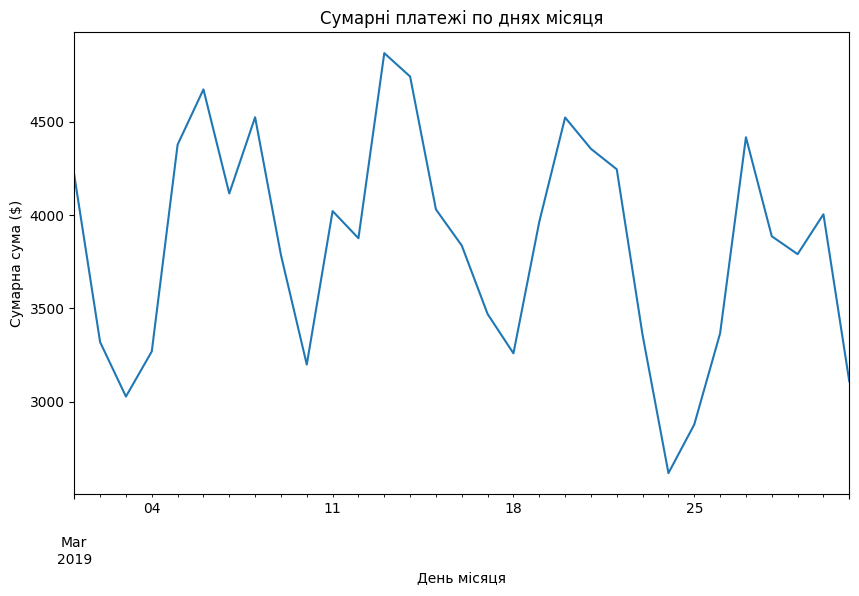

In [53]:
# Групуємо по pickup_day та сумуємо total
daily_total = df_taxi_clean.groupby('pickup_day')['total'].sum()

# Побудова графіка
daily_total.plot(
    figsize=(10, 6),
    title='Сумарні платежі по днях місяця',
    xlabel='День місяця',
    ylabel='Сумарна сума ($)',
);

Приклад очікуваного графіку:

![](https://drive.google.com/uc?export=view&id=1t8yb_NNO2tfwDFDrBNl0BLJoYB0BsUK_)

_У перші дні місяця спостерігається аномально низький обсяг сумарних платежів — деякі значення наближаються до нуля. Така поведінка може свідчити про відсутність або неповноту даних у ці дні. Для перевірки цього припущення доцільно проаналізувати наявність записів у датасеті за відповідні дати. За необхідності, варто здійснити додаткове очищення даних або компенсувати пропуски, якщо це впливає на подальший аналіз._

6.Виведіть кількість рядків для кожного pickup_day.

In [28]:
df_taxi_clean.groupby("pickup_day").size()

,0
pickup_day,
2019-02-28,1
2019-03-01,241
2019-03-02,198
2019-03-03,169
2019-03-04,171
2019-03-05,228
2019-03-06,257
2019-03-07,218
2019-03-08,235


Маєте побачити, що для дати 2019-02-28 є тільки один рядок. Це запис, який, схоже, потрапив сюди випадково, видаліть з набору даних df_taxi_clean рядок, що містить pickup_day рівний 2019-02-28. Та знову виведіть графік сумарних платежів по pickup_day.

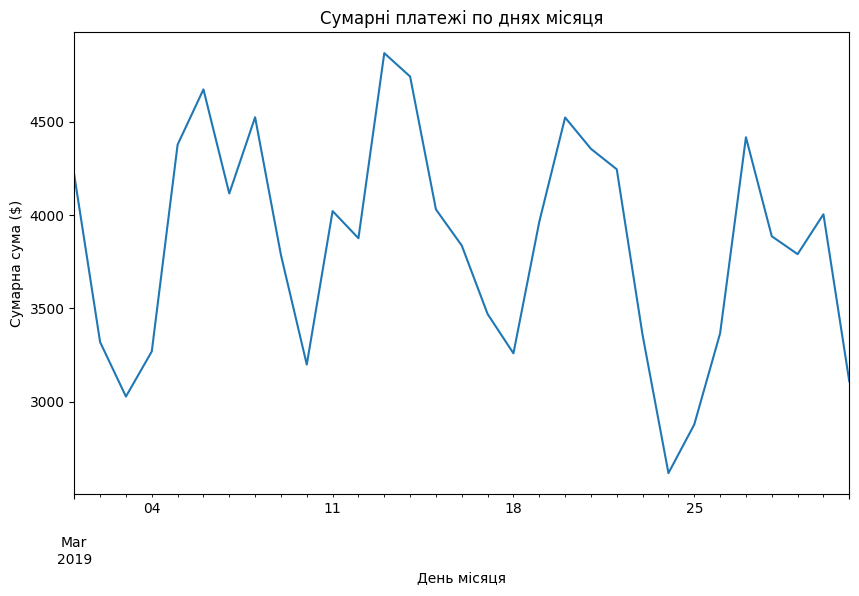

In [29]:
# Видаляємо рядок, де pickup_day дорівнює 2019-02-28
df_taxi_clean = df_taxi_clean[df_taxi_clean['pickup_day'] != '2019-02-28']

# Групуємо дані по днях та рахуємо суму total
daily_total = df_taxi_clean.groupby('pickup_day')['total'].sum()

# Будуємо графік
# Побудова графіка
daily_total.plot(
    #kind='line',
    figsize=(10, 6),
    title='Сумарні платежі по днях місяця',
    xlabel='День місяця',
    ylabel='Сумарна сума ($)',
);

Очікуваний графік:

![](https://drive.google.com/uc?export=view&id=1RfSjsgr5991dlz5bVbfXl8tCnUZhFJ8B)

7.Давайте подивимось на динаміку сумарних платежів по районам. Для цього сформуйте на основі `df_taxi_clean` зводну таблицю, де рядками є `pickup_day`, колонками `pickup_borough`, а значенням - сума платежів. Запишіть зводну таблицю в змінну `borough_pivot`. Наостанок, вилучіть колонку зі значенням `pickup_borough` рівним `NA` - уявімо, що ці дані нас не цікавлять.

In [46]:
# Зведена таблиця: динаміка платежів по pickup_day і pickup_borough
borough_pivot = df_taxi_clean.pivot_table(
    index='pickup_day',
    columns='pickup_borough',
    values='total',
    aggfunc='sum'
)

# Видалимо колонку зі значенням NA (якщо така є)
borough_pivot = borough_pivot.drop(columns=['NA'])

Далі запустіть наступну клітинку та дайте відповідь на питання, в якому районі найчастіше найбільша сума денних платежів за поїздки на таксі?   
До речі, також рекомендую спробувати запустити команду `borough_pivot.plot()` та зрозуміти, навіщо нам тут частина `fillna(0)`.

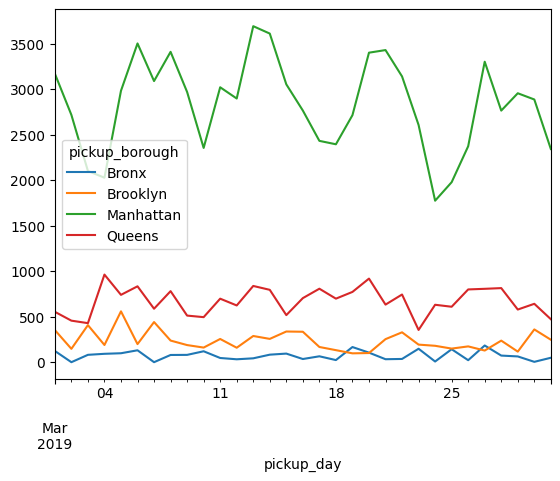

In [47]:
borough_pivot.fillna(0).plot();

 _В районі Manhattan найчастіше найбільша сума денних платежів за поїздки на таксі._

Очікуваний графік :

![](https://drive.google.com/uc?export=view&id=1zhLnMdPCg54j2yzU1hRWv6wseSNPT1Oy)

8.Виведіть будь-яким способом гістограми суми денних платежів за поїздки по кожному з районів. Має бути 4 гістограми, на 4ох різних фігурах, або на одній.   

`Підказка:` Найпростіше це буде зробити, використавши `borough_pivot` та побудову графіку через `<назва датафрейму>.<назва графіку>()` - тобто методом датафрейму з пандаса. Але графік можна побудувати також використовуючи цикл. Для тих, хто хоче потренуватись, рекомендую зробити обома способами.

Пограйтесь з кількістю бінів. Яка кількість бінів на ваш погляд тут є вдалою? Чому?

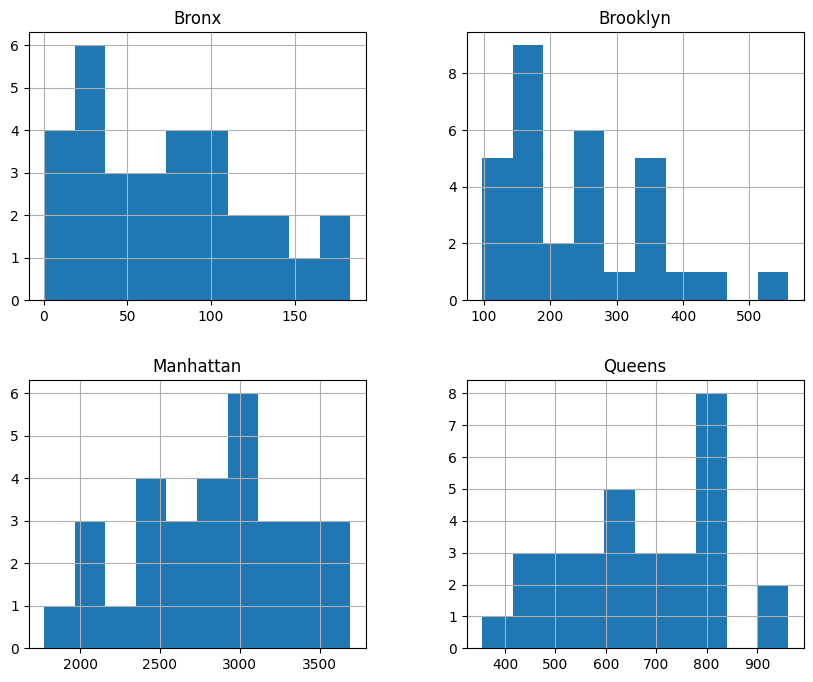

In [49]:
borough_pivot.fillna(0).hist(figsize=(10, 8));

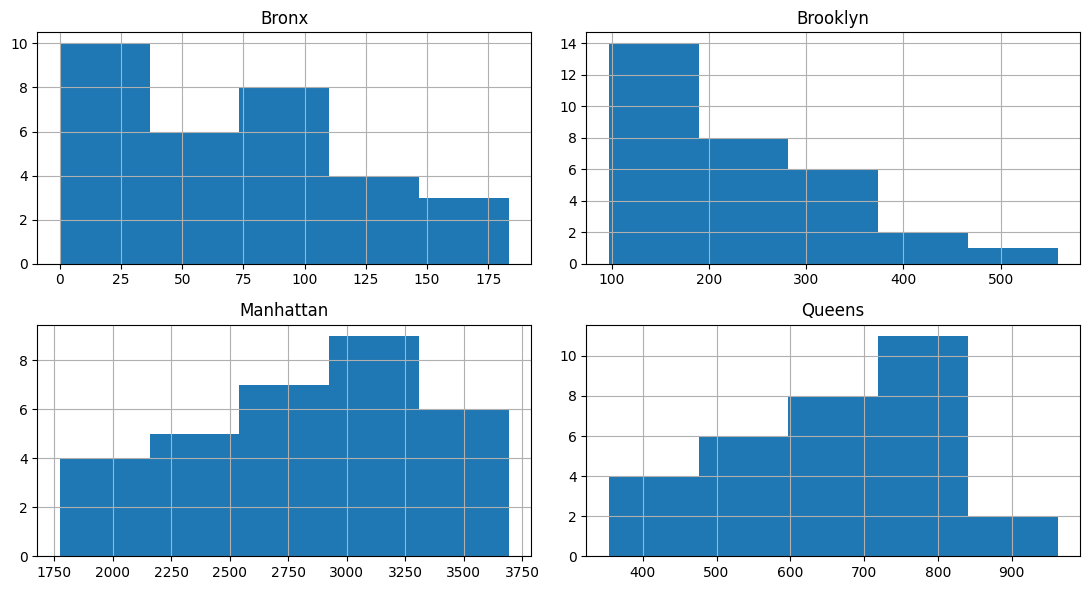

In [54]:
# Варіант через matplotlib
fig, ax = plt.subplots(2,2, figsize=(11, 6))

for i, c in enumerate(borough_pivot.columns):
    x = borough_pivot[c].fillna(0)
    idx_x = 0 if i<=1 else 1
    idx_y = i % 2
    ax[idx_x,idx_y].hist(x, bins=5)
    ax[idx_x,idx_y].set_title(c)
    ax[idx_x,idx_y].grid(True)

plt.tight_layout()
plt.show();

Приклад одного з правильних виконань завдання:

![](https://drive.google.com/uc?export=view&id=1AfkIgwUAtaDiYoiK6NBOqCHBdUngRz4z)

9.Бачимо, що на окремих гістограмах у нас різні діапазони чеків. Припустимо, нам хочеться порівняти розподіли денних сум платежів по райнам. Давайте для цього виведемо 4 гістограми на одній фігурі. Вони звісно ж мають бути різного кольору і напівпрозорими для комфортного перегляду. Створіть гістограму максимально близьку до тої, що надана в очікуваному результаті.
`Підказка:` ця візуалізація створена з допомогою pandas plotting.

In [55]:
borough_pivot.head()

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,123.42,353.05,3169.47,553.29
2019-03-02,NaN,146.56,2716.33,456.13
2019-03-03,80.75,407.06,2100.23,428.73
2019-03-04,92.00,188.73,2026.17,962.18
2019-03-05,98.16,558.40,2981.26,739.56


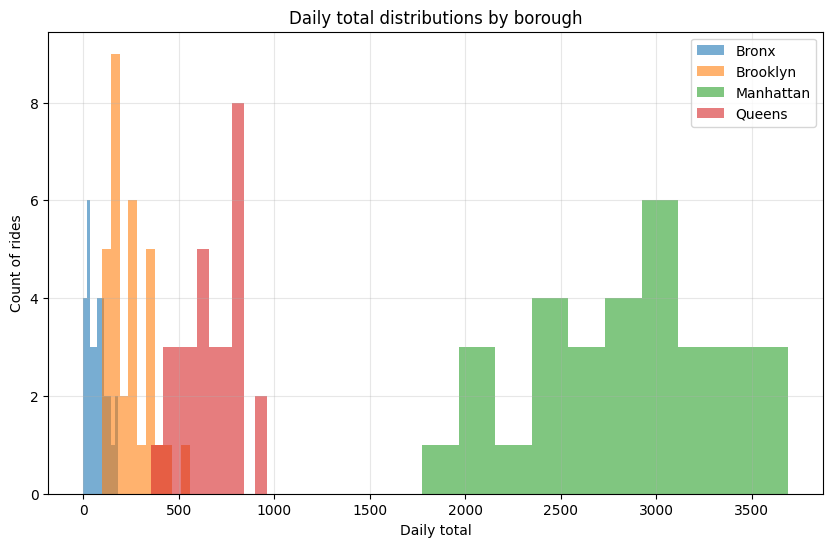

In [58]:
plt.figure(figsize=(10,6))
for col in borough_pivot.fillna(0).columns:
    plt.hist(borough_pivot.fillna(0)[col], bins=10, alpha=0.6, label=col)

plt.title("Daily total distributions by borough")
plt.xlabel('Daily total')
plt.ylabel('Count of rides')
plt.legend()

plt.grid(axis='both', alpha=.3)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1J5PCLfVovNqeGxeeBGFUSS1Kqh6-UnwR)

А ось приклад, як можна було сформувати щось подібне з допомогою функціоналу seaborn. Як на мене візуалізація за замовчанням не є зручною для розуміння.  

`Опціональне завдання`: Пограйтесь з налаштуваннями і пошукайте варіант, за якого візуалізація розподілу суми денних платежів через seaborn є на ваш погляд зручною для аналізу.

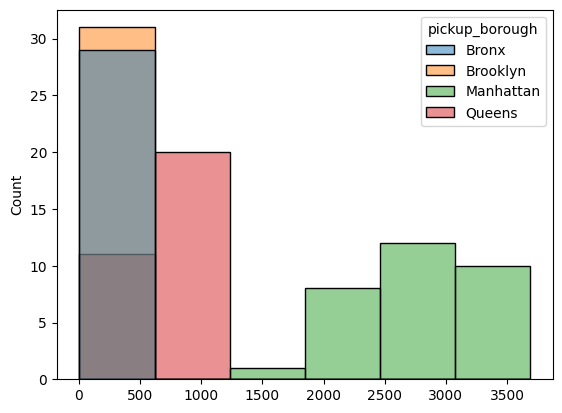

In [59]:
sns.histplot(data=borough_pivot, bins=6);

10.З допомогою seaborn виведіть гістограми суми щомісячних платежів по кольорам автомобілів (колонка `color`). На одній фігурі має бути кількість гістограм рівна кількості різних кольорів автомобілів в наборі даних. Встановіть розмір фігури (10,5) та знайдіть значення dots-per-inch для фігури за якого якість зображення буде хорошою (зображення не буде розмитим).
`Підказки:`
1. побудувати візуалізацію можна в один рядок коду, і ще один рядок - для встановлення розмірів і роздільної здатності фігури.
2. для зміни порядку відображення гістограм кольорів автомобілів (аби менша гістограма була перед, а не за більшою) можна посортувати датафрейм за полем кольору так, аби отримати той порядок, який вам потрібен.

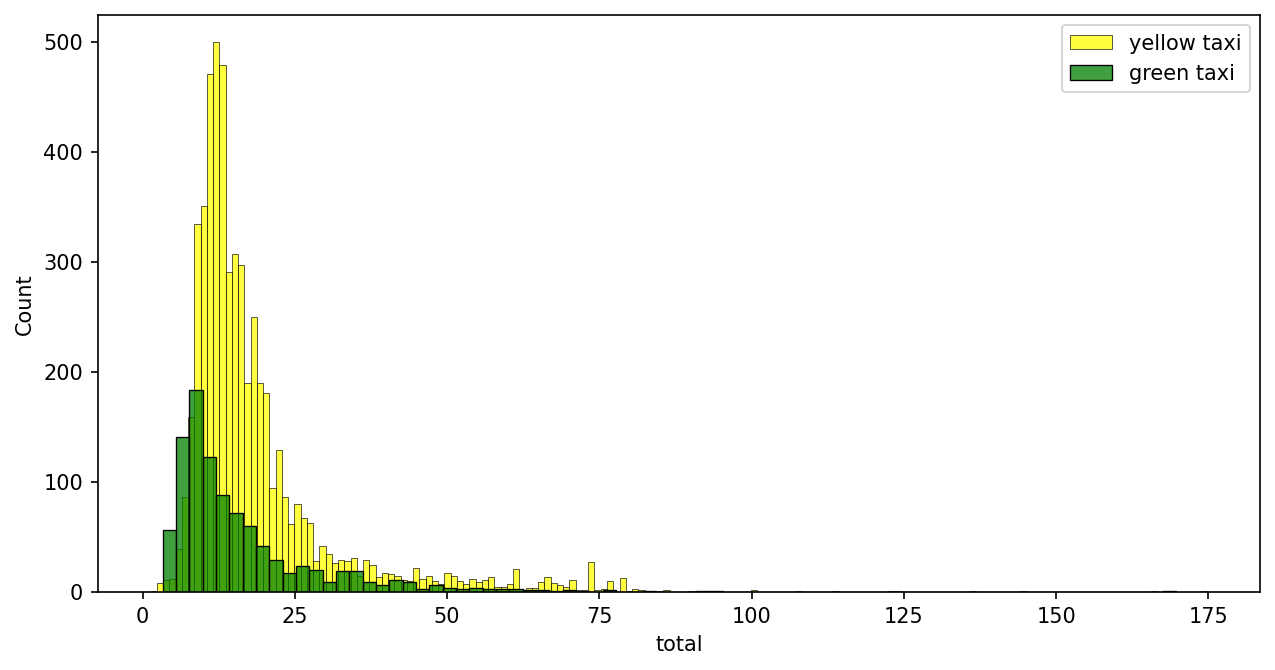

In [62]:
plt.figure(figsize=(10, 5), dpi=150)
sns.histplot(df_taxi_clean[df_taxi_clean["color"] == "yellow"], x="total", color = "yellow", label = "yellow taxi")
sns.histplot(df_taxi_clean[df_taxi_clean["color"] == "green"], x="total", color = "green", label = "green taxi")
plt.legend();

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=17j9hUAo0-65yEuCMHOHUlEW0nRqePOrW)

11.Цікаво, а чи є залежність між дальністю поїздки і розміром чайових? Побудуйте діаграму розсіювання між дальністю поїздки і розміром чайових. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати.

В очікуваному результаті я надаю графік, який би будувала я. На наведеному прикладі найскладніша частина - це зробити червоною цю лінію тренду (вона побудована з допомогою спеціального типу графіку в seaborn). Аби вказати колір лінії в тому типу графіку треба зазначити в параметрі `line_kws`, що ми хочемо лінію червоного кольору. Але якщо у вас не буде виходити лінія червоного кольору - нехай буде синього - це не критично :)

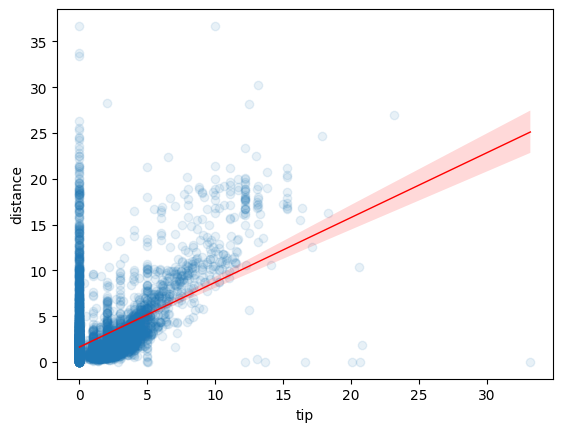

In [64]:
sns.regplot(x='tip', y='distance', data=df_taxi_clean, line_kws={'color':'red', 'lw':'1'}, scatter_kws={'alpha': 0.1});

Один з можливих результатів (побудовано з seaborn):

![](https://drive.google.com/uc?export=view&id=19PtgLlPTJ1iR_AxcnBDZUw-U3Ulr6Cpy)

12.Дайте відповідь на питання: що означає пряма лінія з точок, паралельна осі, за якою розташована дальність поїздки?

In [65]:
df_taxi_clean[df_taxi_clean["tip"] == 0][["tip", "distance"]].sort_values(by="distance", ascending=False)

,tip,distance
5364,0.0,36.70
4050,0.0,33.76
5648,0.0,33.46
2231,0.0,26.35
5567,0.0,25.51
...,...,...
1690,0.0,0.00
1929,0.0,0.00
5796,0.0,0.00
6314,0.0,0.00


_Пряма лінія з точок, паралельна осі У, показує, що є поїздки, де відстань була не рівною 0, але тіпси не залишали._

13.Побудуйте поденну динаміку чайових по районам, в яких забрали пасажира. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. Важливо, щоб на одному графіку було 4 лінії (всі райони, крім `NA`), які відображають динаміку чайових, була легенда і були підписи вісей. В очікуваному результаті я надаю графік, який би будувала я.

Дайте відповіді на питання:
- при початку поїздки в якому районі **найнижчий середній розмір** чайових?
- а в поїздках з якого району **найвищий середній розмір** чайових?
- при проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у день)?

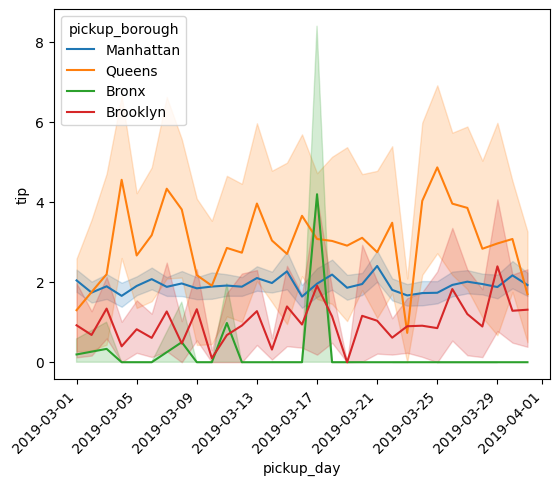

In [66]:
sns.lineplot(x='pickup_day', y='tip', hue='pickup_borough', data=df_taxi_clean[df_taxi_clean.pickup_borough!='NA'])
plt.xticks(rotation=45, ha='right');

_Bronx має найнижчий середній розмір чайових серед усіх районів. Queens демонструє найвищий середній рівень чайових під час поїздок. Manhattan вирізняється стабільністю — тут спостерігається найменша варіабельність у розмірі чайових з дня у день._




Один з можливих результатів (побудовано з seaborn):

![](https://drive.google.com/uc?export=view&id=1yoEqYwNwyQmTTrkk_Mz6D-ruAvE-Sx8q)

14.Побудуйте box-plot розміру чайових по району (всі райони, крім `NA`) старту поїздки. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати.

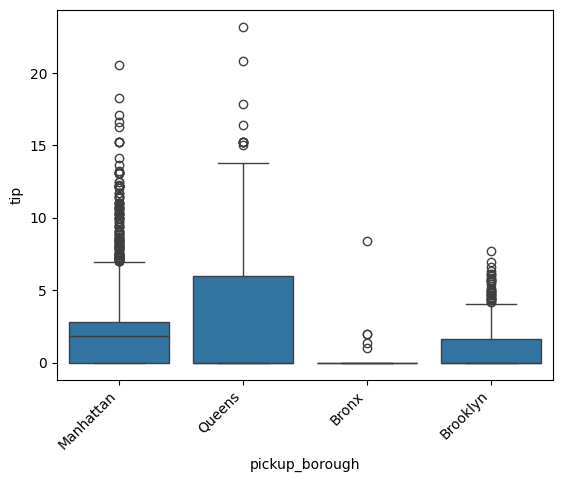

In [68]:
sns.boxplot(y='tip', x='pickup_borough', data=df_taxi_clean[df_taxi_clean.pickup_borough!='NA'])
plt.xticks(rotation=45, ha='right');

Один з можливих результатів (побудовано з seaborn):

![](https://drive.google.com/uc?export=view&id=1o6dFRTSj0gLQ_DMWeb7upqvuPNsL0MQc)



15.Творче завдання. Створіть ТРИ інформативних візуалізації, які б допомогли в аналізі цих даних.

Що вам було б цікаво дізнатись про ці поїздки? Як це можна було б використати при прийнятті рішень бізнесом? Наприклад, якщо найбільше поїздок в певний час доби, значить, треба стимулювати водіїв працювати в ці години. Якщо найбільше поїздок з певного району - треба тримати там запас авто, які б могли взяти пасажирів і т.д. Не обмежуйте свою фантазію.

Візуалізації мають бути не тими, на які ми вже побудували вище. Але можна створювати аналогічні, просто з використанням інших полів даних. І описати, що ви бачите з тих візуалізацій. Без виконання цього завдання ДЗ не приймаєтья. Якщо є питання щодо виконання - пишіть у чат.

Нижче приклади додаткових візуалізацій до наших даних


1. Розподіл поїздок за часом доби.


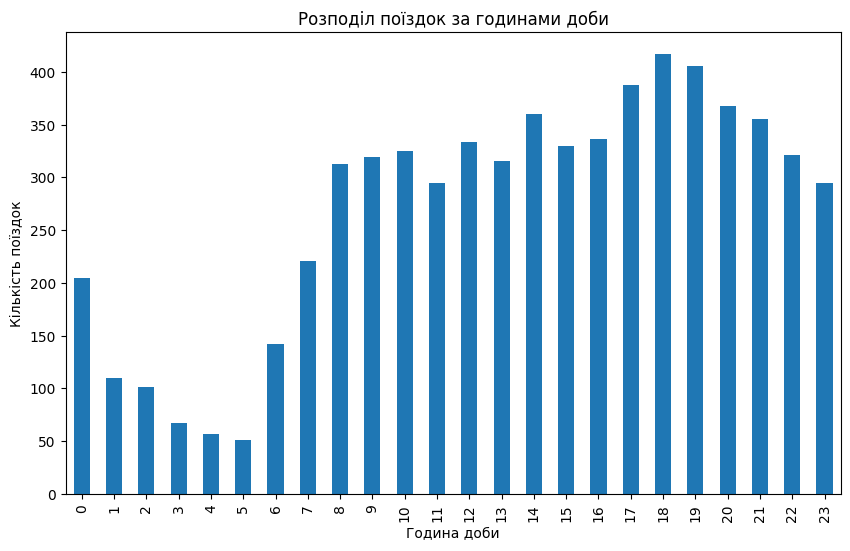

In [69]:
df_taxi_clean['pickup'] = pd.to_datetime(df_taxi_clean['pickup'])
df_taxi_clean['hour'] = df_taxi_clean['pickup'].dt.hour

df_taxi_clean.groupby('hour').size().plot(kind='bar', figsize=(10, 6))
plt.title('Розподіл поїздок за годинами доби')
plt.xlabel('Година доби')
plt.ylabel('Кількість поїздок')
plt.show();

2. Метод оплати, що переважає серед клієнтів.

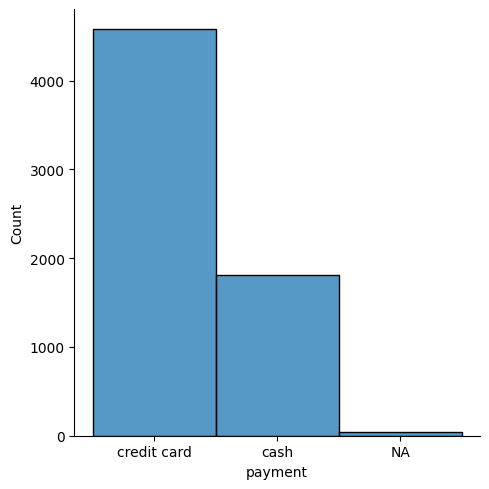

In [71]:
sns.displot(x='payment', data=df_taxi_clean);

3. Вплив відстані на ціну поїздки.

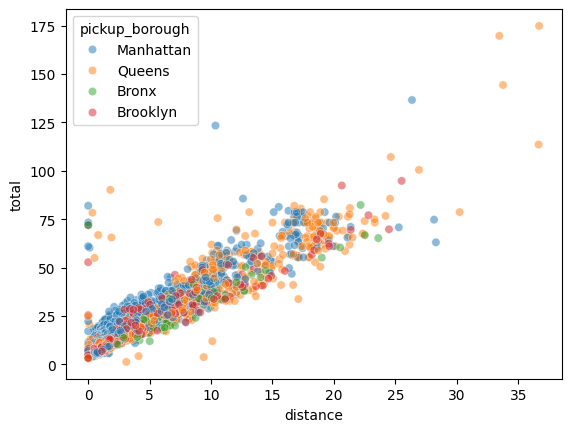

In [73]:
sns.scatterplot(data = df_taxi, x='distance', y='total', hue='pickup_borough', alpha=0.5);

Між відстанню поїздки та її вартістю простежується чітка позитивна кореляція: чим більшою є відстань, тим вища загальна вартість поїздки.

Більшість поїздок зосереджена в межах: відстані до 10 миль тавартості до $50. Це вказує на те, що типові поїздки є короткими або середньої довжини, з помірною платою.